In [29]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
sd = datetime.datetime(2006,1,1)
ed = datetime.datetime(2016,1,1)

In [3]:
BAC = data.DataReader("BAC", 'morningstar', sd, ed)

In [4]:
C = data.DataReader("C",'morningstar',sd,ed)

In [5]:
GS = data.DataReader("GS", 'morningstar',sd,ed)

In [6]:
JPM = data.DataReader("JPM",'morningstar',sd,ed)

In [7]:
MS = data.DataReader("MS",'morningstar',sd,ed)

In [8]:
WFC = data.DataReader("WFC",'morningstar',sd,ed)

In [9]:
tick = ['BAC', 'C', 'GS','JPM', 'MS', 'WFC']

In [10]:
stocks = pd.concat([BAC.reset_index(level=0,drop=True), C.reset_index(level=0,drop=True), GS.reset_index(level=0,drop=True), JPM.reset_index(level=0,drop=True), MS.reset_index(level=0,drop=True), WFC.reset_index(level=0,drop=True)], axis = 1,keys = tick)

In [11]:
stocks.head()

BAC                                     C                       \
            Close   High    Low   Open    Volume  Close   High    Low   Open   
Date                                                                           
2006-01-02  46.15  46.36  45.91  46.02         0  485.3  487.1  482.2  483.5   
2006-01-03  47.08  47.18  46.15  46.92  16197900  492.9  493.8  481.1  490.0   
2006-01-04  46.58  47.24  46.45  47.00  17427400  483.8  491.0  483.5  488.6   
2006-01-05  46.64  46.83  46.32  46.58  14668900  486.2  487.8  484.0  484.4   
2006-01-06  46.57  46.91  46.35  46.80  11965700  486.2  489.0  482.0  488.8   

                       ...          MS                                      \
             Volume    ...       Close     High      Low     Open   Volume   
Date                   ...                                                   
2006-01-02        0    ...     47.1008  47.3333  46.7107  47.2751        0   
2006-01-03  1536700    ...     48.4041  48.5535  47.1008  47.4578  6354408   
2006-01-04  1852790    ...     48.4373  49.2093  48.4373  48.7278  9292188   
2006-01-05  1015470    ...     48.5701  48.6365  48.1634  48.6033  6534262   
2006-01-06  1358930    ...     48.6199  48.8524  48.1883  48.7860  8146445   

               WFC                                    
             Close    High     Low    Open    Volume  
Date                                                  
2006-01-02  31.415  31.535  31.215  31.415         0  
2006-01-03  31.900  31.975  31.195  31.600  11015000  
2006-01-04  31.530  31.820  31.365  31.800  10594000  
2006-01-05  31.495  31.555  31.310  31.500   9927600  
2006-01-06  31.680  31.775  31.385  31.580   8324000  

[5 rows x 30 columns]

In [12]:
stocks.columns.names = ['Bank Ticker','Stock Info']

In [13]:
stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info   Close   High    Low   Open    Volume  Close   High    Low   Open   
Date                                                                            
2006-01-02   46.15  46.36  45.91  46.02         0  485.3  487.1  482.2  483.5   
2006-01-03   47.08  47.18  46.15  46.92  16197900  492.9  493.8  481.1  490.0   
2006-01-04   46.58  47.24  46.45  47.00  17427400  483.8  491.0  483.5  488.6   
2006-01-05   46.64  46.83  46.32  46.58  14668900  486.2  487.8  484.0  484.4   
2006-01-06   46.57  46.91  46.35  46.80  11965700  486.2  489.0  482.0  488.8   

Bank Ticker             ...          MS                                      \
Stock Info    Volume    ...       Close     High      Low     Open   Volume   
Date                    ...                                                   
2006-01-02         0    ...     47.1008  47.3333  46.7107  47.2751        0   
2006-01-03   1536700    ...     48.4041  48.5535  47.1008  47.4578  6354408   
2006-01-04   1852790    ...     48.4373  49.2093  48.4373  48.7278  9292188   
2006-01-05   1015470    ...     48.5701  48.6365  48.1634  48.6033  6534262   
2006-01-06   1358930    ...     48.6199  48.8524  48.1883  48.7860  8146445   

Bank Ticker     WFC                                    
Stock Info    Close    High     Low    Open    Volume  
Date                                                   
2006-01-02   31.415  31.535  31.215  31.415         0  
2006-01-03   31.900  31.975  31.195  31.600  11015000  
2006-01-04   31.530  31.820  31.365  31.800  10594000  
2006-01-05   31.495  31.555  31.310  31.500   9927600  
2006-01-06   31.680  31.775  31.385  31.580   8324000  

[5 rows x 30 columns]

In [14]:
stocks.xs(key = 'Close',axis = 1,level = 'Stock Info').max()

Bank Ticker
BAC     54.9000
C      564.1000
GS     247.9200
JPM     70.0800
MS      74.1294
WFC     58.5200
dtype: float64

In [15]:
returns = pd.DataFrame()

In [16]:
for t in tick:
    returns[t + ' Return'] = stocks[t]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03,0.020152,0.015660,0.009083,0.012598,0.027670,0.015438
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874


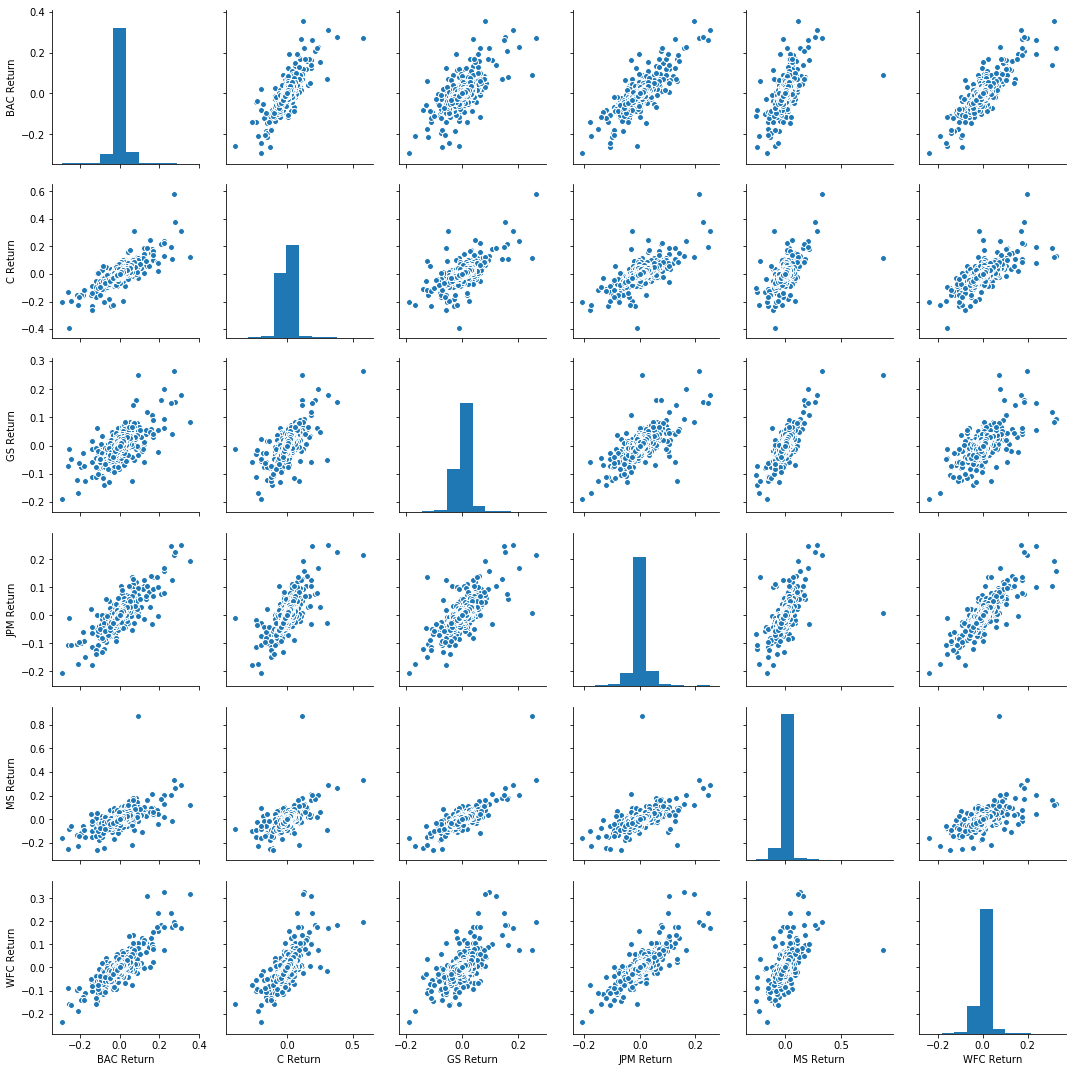

In [17]:
sns.pairplot(returns[2:])

In [18]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [19]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [20]:
returns.std()

BAC Return    0.035987
C Return      0.037977
GS Return     0.024950
JPM Return    0.027223
MS Return     0.037043
WFC Return    0.029697
dtype: float64

In [23]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.015880
C Return      0.015022
GS Return     0.013801
JPM Return    0.013772
MS Return     0.015966
WFC Return    0.012372
dtype: float64

C:\Users\mgdia\Anaconda3\envs\MinasMorgul\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


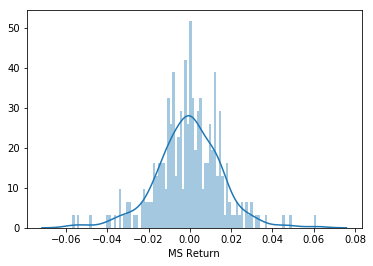

In [25]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], bins = 100)

C:\Users\mgdia\Anaconda3\envs\MinasMorgul\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


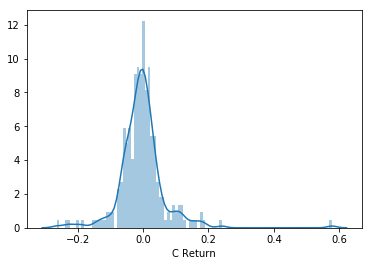

In [26]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], bins = 100)

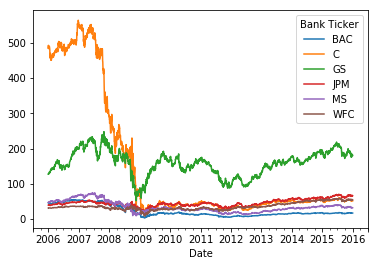

In [27]:
stocks.xs(key = 'Close',axis = 1,level = 'Stock Info').plot()

Series([], Name: Close, dtype: float64)

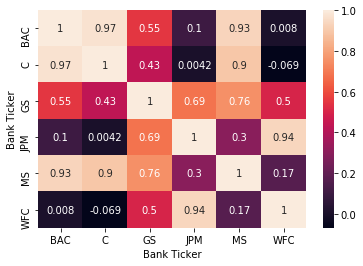

In [43]:
sns.heatmap(stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot = True)

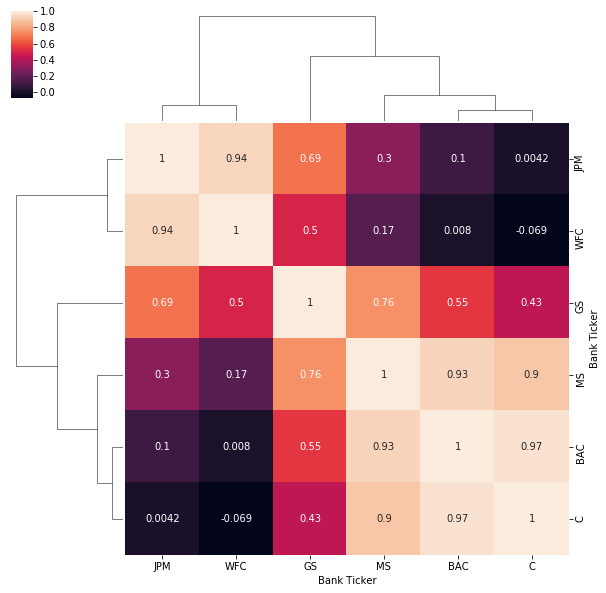

In [44]:
sns.clustermap(stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot = True)

In [46]:
import cufflinks as cf
cf.go_offline()
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

ImportError: No module named 'cufflinks'